In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings as warnings
import scipy.stats as stats
import statsmodels.api as sm

from index_pair_classes import *
from regression_function import *

warnings.filterwarnings('ignore')

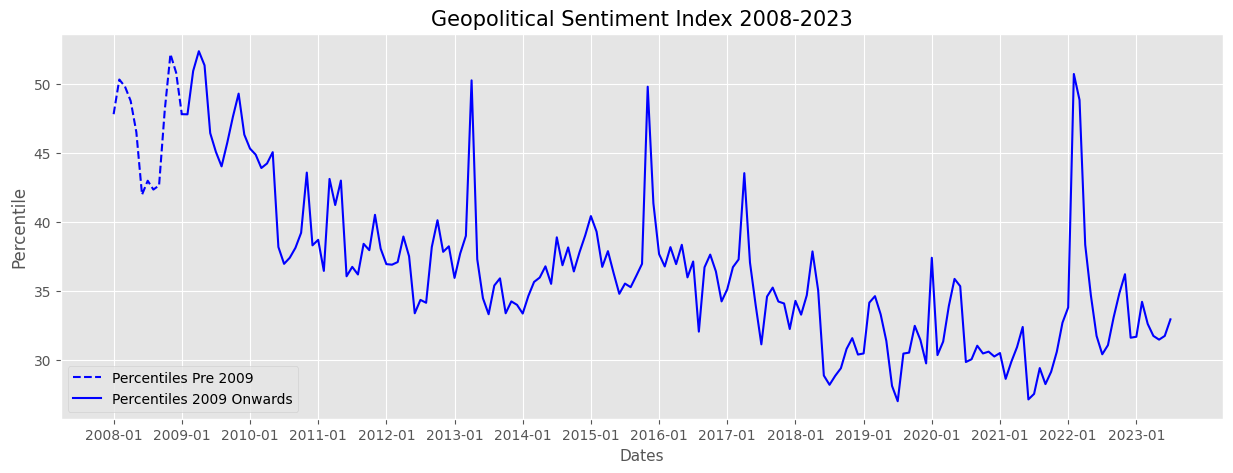

In [2]:
gsi_index_data = pd.read_csv('GSIData.csv', index_col='Month')
GSIIndex = SentimentIndex(gsi_index_data)
GSIIndex.plotIndex()


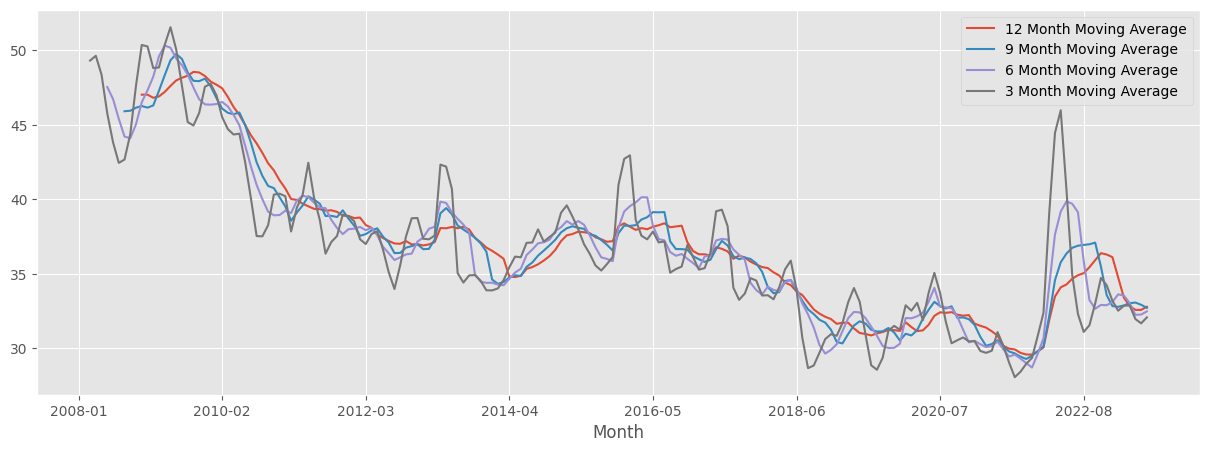

In [3]:
fig = plt.figure(figsize=(15,5))
GSIIndex.movingAverage(12).plot(label='12 Month Moving Average')
GSIIndex.movingAverage(9).plot(label='9 Month Moving Average')
GSIIndex.movingAverage(6).plot(label='6 Month Moving Average')
GSIIndex.movingAverage(3).plot(label='3 Month Moving Average')
plt.legend()
plt.show()

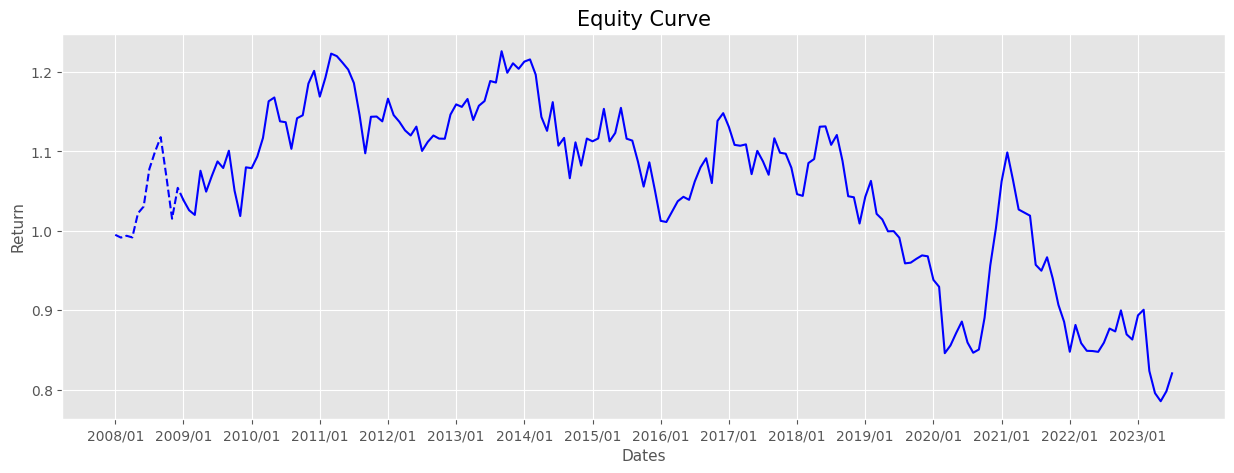

In [4]:
iwm_spy_data = pd.read_csv('IWM_SPY_data.csv', index_col='Date')
IWM_SPY_pair = TradePair(iwm_spy_data)
IWM_SPY_equity = IWM_SPY_pair.equityCurve()
IWM_SPY_pair.equity.to_csv('IWM_SPY_equity.csv')

### Regression of Index Moving Average onto Pair Values

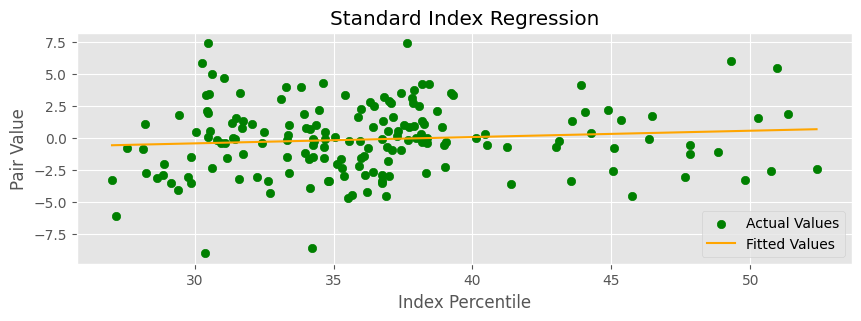

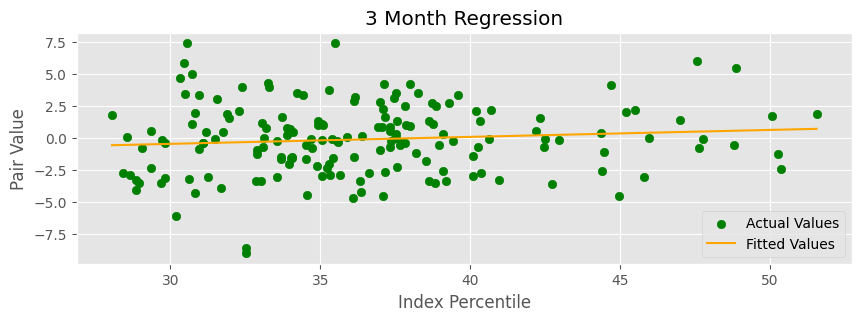

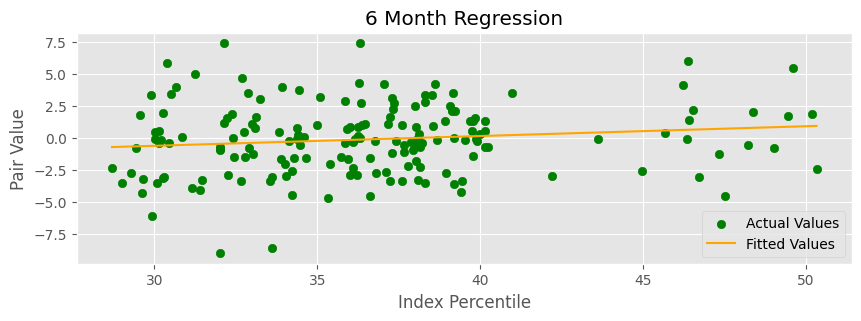

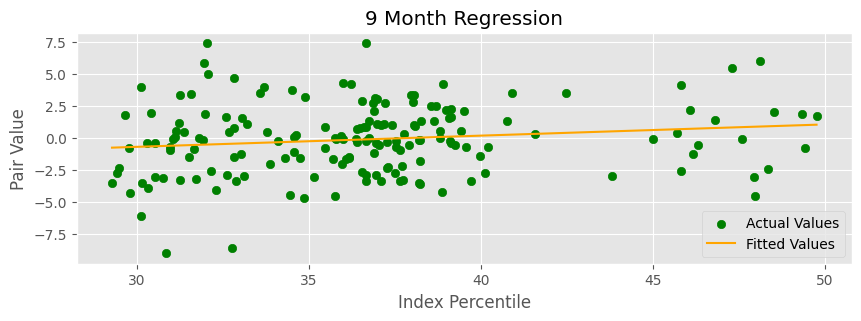

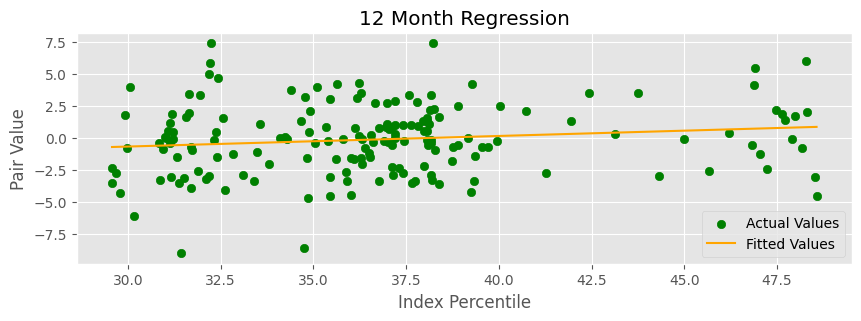

In [5]:
ma0_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=0)
ma3_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=3)
ma6_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=6)
ma9_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=9)
ma12_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=12)

In [6]:
ma_fit_df = pd.DataFrame(data=[ma0_fit, ma3_fit, ma6_fit, ma9_fit, ma12_fit],
                      columns=['Slope', 'Intercept', 'T-Stat Slope', 'T-Stat Intercept', 'p-Value Slope', 'p-Value Intercept'],
                     index = [0,3,6,9,12])
ma_fit_df.index.name = 'Months MA'
ma_fit_df

,Slope,Intercept,T-Stat Slope,T-Stat Intercept,p-Value Slope,p-Value Intercept
Months MA,,,,,,
0,-1.906508,0.049313,-1.359892,1.291891,0.175654,0.198138
3,-2.093219,0.054283,-1.400256,1.336065,0.163248,0.183303
6,-2.901956,0.076207,-1.858275,1.800258,0.064849,0.073582
9,-3.316519,0.087307,-2.075160,2.019868,0.039469,0.044958
12,-3.151583,0.082553,-1.949667,1.893831,0.052851,0.059936


### Regression of Percentage Change of Index onto Pair Values

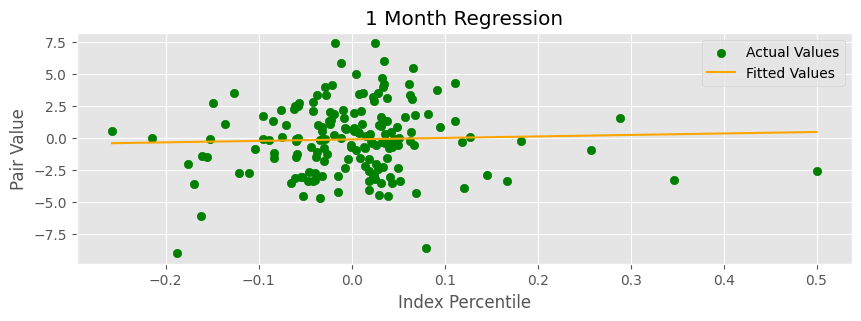

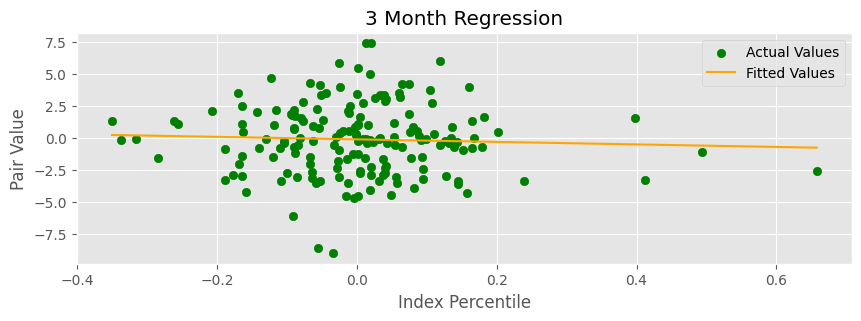

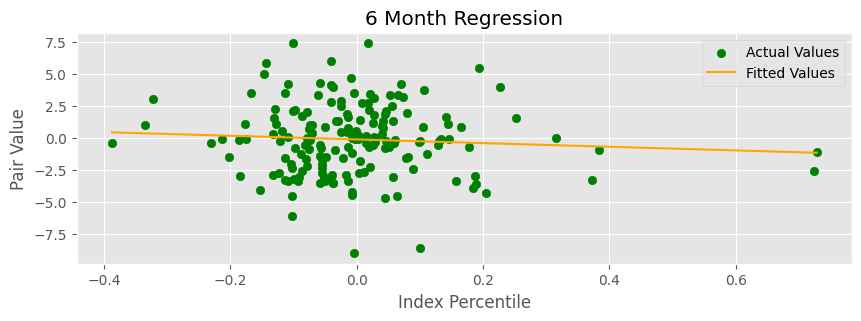

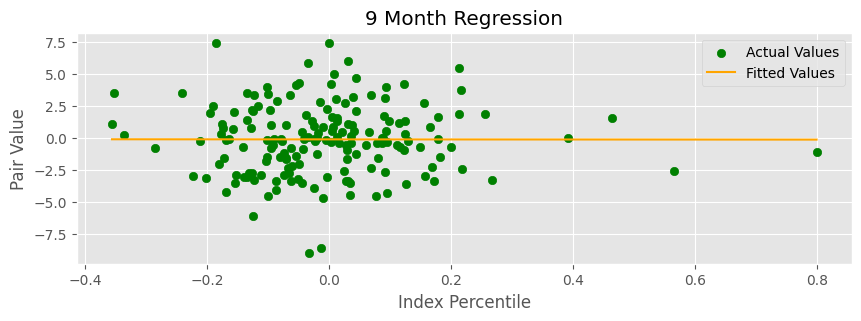

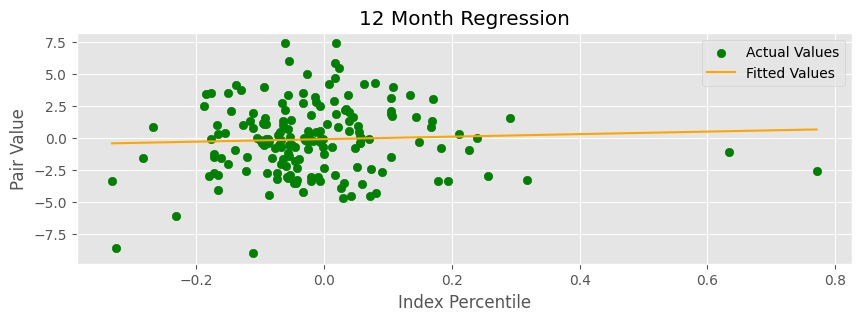

In [7]:
perc1_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=1, MA=False)
perc3_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=3, MA=False)
perc6_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=6, MA=False)
perc9_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=9, MA=False)
perc12_fit = regressionPair(gsi_index_data=gsi_index_data, pair_data=iwm_spy_data, time_window=12, MA=False)

In [8]:
perc_fit_df = pd.DataFrame(data=[perc1_fit, perc3_fit, perc6_fit, perc9_fit, perc12_fit],
                      columns=['Slope', 'Intercept', 'T-Stat Slope', 'T-Stat Intercept', 'p-Value Slope', 'p-Value Intercept'],
                     index = [1,3,6,9,12])
perc_fit_df.index.name = 'Months MA'
display(perc_fit_df)

,Slope,Intercept,T-Stat Slope,T-Stat Intercept,p-Value Slope,p-Value Intercept
Months MA,,,,,,
1,-0.116313,1.154336,-0.559426,0.491207,0.576603,0.623910
3,-0.114788,-0.984041,-0.552354,-0.619526,0.581427,0.536395
6,-0.120717,-1.425286,-0.581522,-0.945983,0.561655,0.345492
9,-0.115349,-0.022072,-0.553807,-0.015672,0.580434,0.987514
12,-0.098601,0.981209,-0.470718,0.630208,0.638442,0.529400


## Trading Strategies

In [9]:
pair_IWMSPY = TradePair(iwm_spy_data)
GSI = SentimentIndex(gsi_index_data)

def testMAStrat(trailing_months_test, reverse=False):
    for m in trailing_months_test:
        testSPYIWM_stratperf, test_SPYIWM = pair_IWMSPY.tradePairMA(m, GSI, reverse=reverse)
        teststrat = pd.DataFrame([testSPYIWM_stratperf],index = ['IWM-SPY'],
                                 columns = ['Return % / Alpha if with SPY', 'Volatility', 'Sharpe Ratio'])
        print('\n Performance of Strategy with %i month MA used:' %m)
        display(teststrat)

        plt.figure(figsize = (10,3))
        plt.plot(test_SPYIWM, 'magenta', label = 'IWM-SPY')
        if not reverse:
            plt.title('Equity Curves for %i Month MA Strategies (Standard)'  %m, fontsize = 12)
        else:
            plt.title('Equity Curves for %i Month MA Strategies (Reverse)'  %m, fontsize = 12)
        plt.xlabel('Months', fontsize = 10)
        plt.ylabel('Portfolio Value change from Start',fontsize = 10)
        plt.legend()
        plt.show()

def testPCStrat(trailing_months_test, reverse=False):
    for m in trailing_months_test:
        testSPYIWM_stratperf, test_SPYIWM = pair_IWMSPY.tradePairPercs(m, GSI, reverse=reverse)
        teststrat = pd.DataFrame([testSPYIWM_stratperf],index = ['IWM-SPY'],
                                 columns = ['Return % / Alpha if with SPY', 'Volatility', 'Sharpe Ratio'])
        print('\n Performance of Strategy with %i month PC used:' %m)
        display(teststrat)

        plt.figure(figsize = (10,3))
        plt.plot(test_SPYIWM, 'magenta', label = 'IWM-SPY')
        if not reverse:
            plt.title('Equity Curves for %i Month PC Strategies (Standard)'  %m, fontsize = 12)
        else:
            plt.title('Equity Curves for %i Month PC Strategies (Reverse)'  %m, fontsize = 12)
        plt.xlabel('Months', fontsize = 10)
        plt.ylabel('Portfolio Value change from Start',fontsize = 10)
        plt.legend()
        plt.show()
        
        


 Performance of Strategy with 1 month MA used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,0.7327,9.402,0.0779


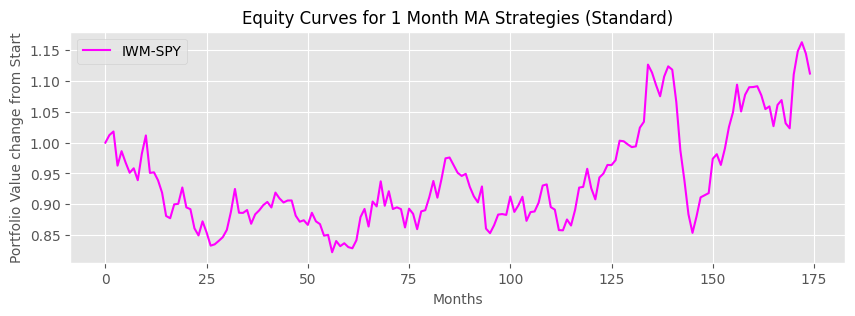


 Performance of Strategy with 3 month MA used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,-0.5984,9.408,-0.0636


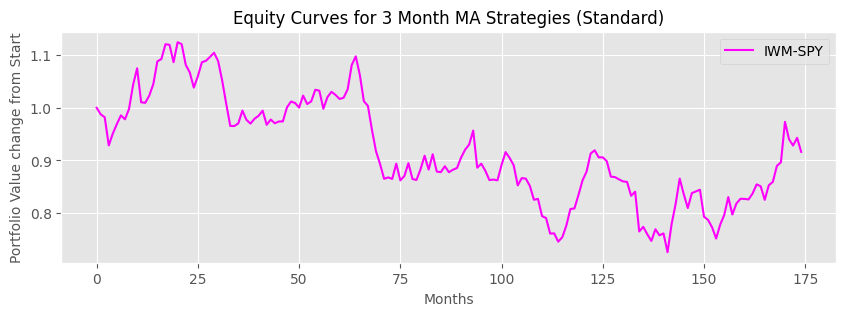


 Performance of Strategy with 6 month MA used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,0.7076,9.4023,0.0753


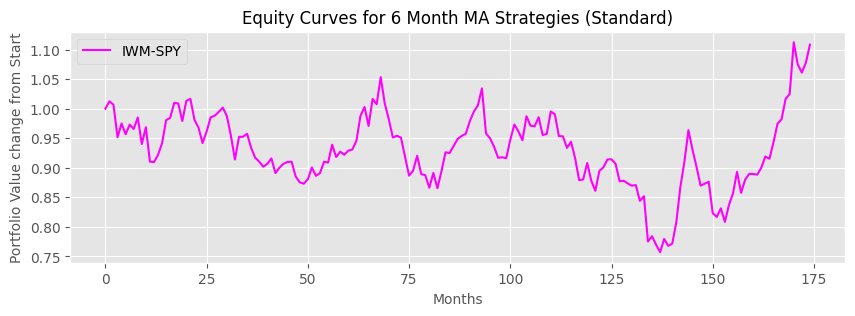


 Performance of Strategy with 9 month MA used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,-0.3859,9.4081,-0.041


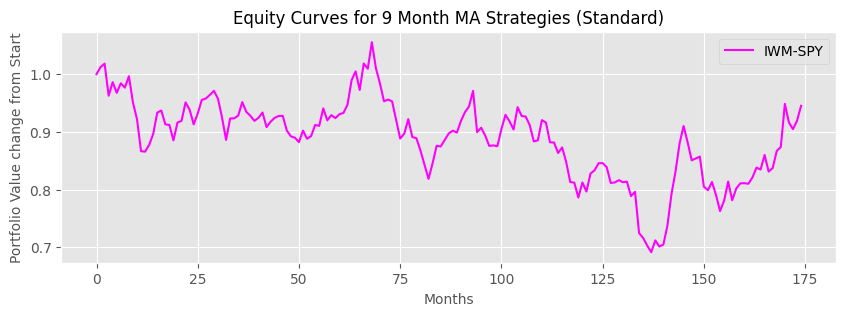


 Performance of Strategy with 12 month MA used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,-1.4714,9.4034,-0.1565


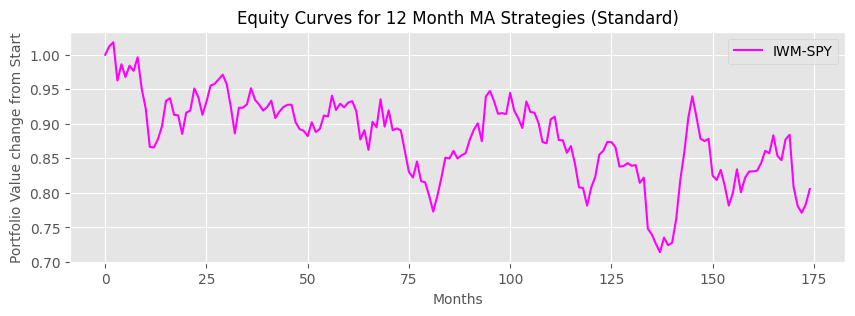

In [10]:
testMAStrat([1,3,6,9,12], reverse=False)


 Performance of Strategy with 1 month PC used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,1.6968,9.3881,0.1807


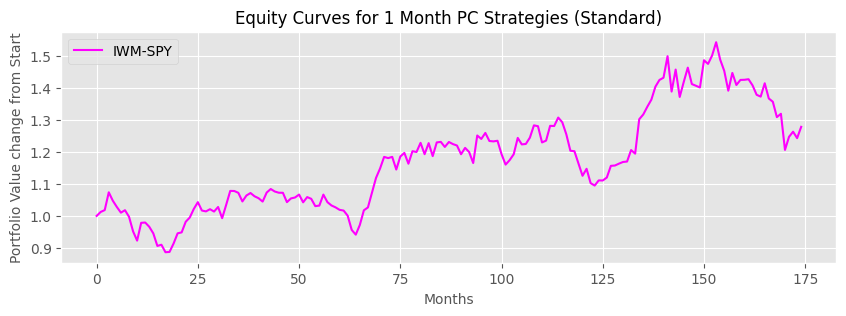


 Performance of Strategy with 3 month PC used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,0.9561,9.3996,0.1017


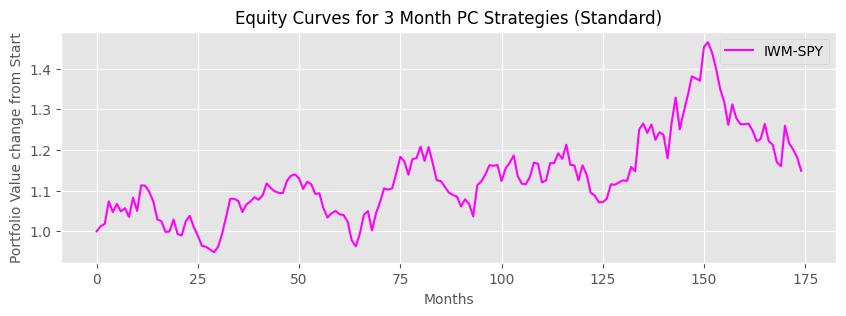


 Performance of Strategy with 6 month PC used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,1.5282,9.3911,0.1627


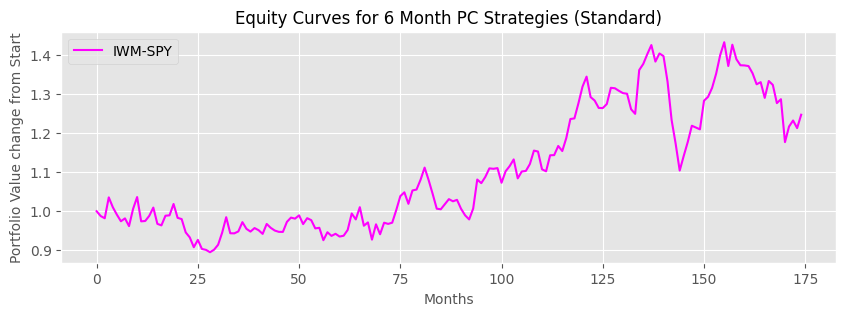


 Performance of Strategy with 9 month PC used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,2.7418,9.3642,0.2928


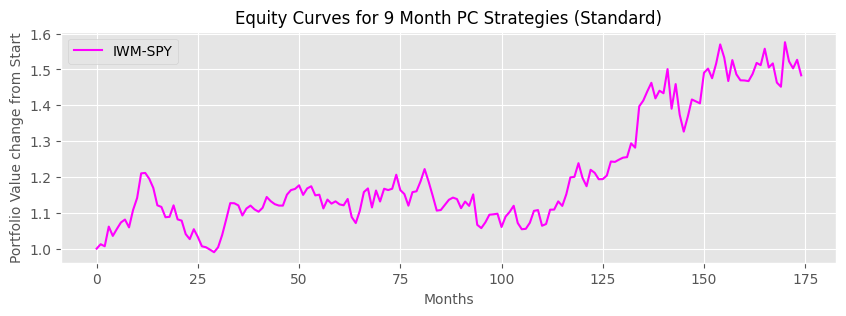


 Performance of Strategy with 12 month PC used:


,Return % / Alpha if with SPY,Volatility,Sharpe Ratio
IWM-SPY,3.5972,9.3379,0.3852


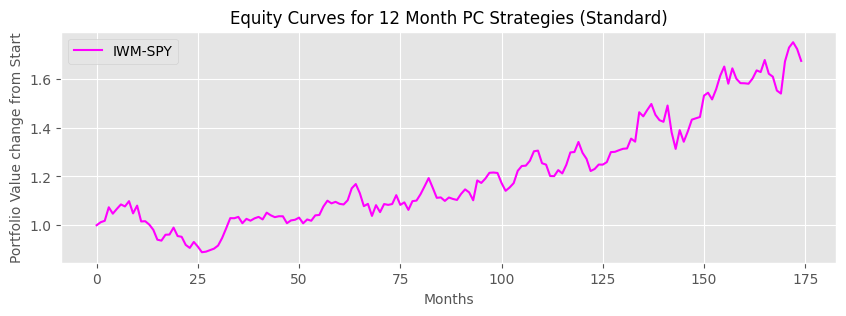

In [11]:
testPCStrat([1,3,6,9,12], reverse=False)